# the quadratic kernel

In [ ]:
import numpy as np
import pandas as pd

# Define the quadratic feature map function
def phi(x):
    x1, x2 = x
    return np.array([x1**2, np.sqrt(2)*x1*x2, x2**2])

# Define the data: (x1, x2), label y, and number of mistakes
data = [
    {"x": (0,0), "y": -1, "mistakes": 1},
    {"x": (2,0), "y": -1, "mistakes": 65},
    {"x": (1,1), "y": -1, "mistakes": 11},
    {"x": (0,2), "y": -1, "mistakes": 31},
    {"x": (3,3), "y": -1, "mistakes": 72},
    {"x": (4,1), "y": +1, "mistakes": 30},
    {"x": (5,2), "y": +1, "mistakes": 0},
    {"x": (1,4), "y": +1, "mistakes": 21},
    {"x": (4,4), "y": +1, "mistakes": 4},
    {"x": (5,5), "y": +1, "mistakes": 15},
]

# Initialize theta and theta0
theta = np.array([0.0, 0.0, 0.0])
theta_0 = 0.0

# Step-by-step update
updates = []
for i, point in enumerate(data):
    x = point["x"]
    y = point["y"]
    mistakes = point["mistakes"]
    phi_x = phi(x)
    update = mistakes * y * phi_x
    theta += update
    theta_0 += mistakes * y
    updates.append({
        "Index": i + 1,
        "x": x,
        "y": y,
        "mistakes": mistakes,
        "phi(x)": np.round(phi_x, 2),
        "update": np.round(update, 2),
        "theta after update": np.round(theta, 2),
        "theta_0": np.round(theta_0, 2)
    })

# Display results
df = pd.DataFrame(updates)

# import ace_tools as tools; tools.display_dataframe_to_user(name="Kernel Perceptron Updates", dataframe=df)

theta_0, theta


(-110.0, array([ 21.      , -22.627417,  22.      ]))

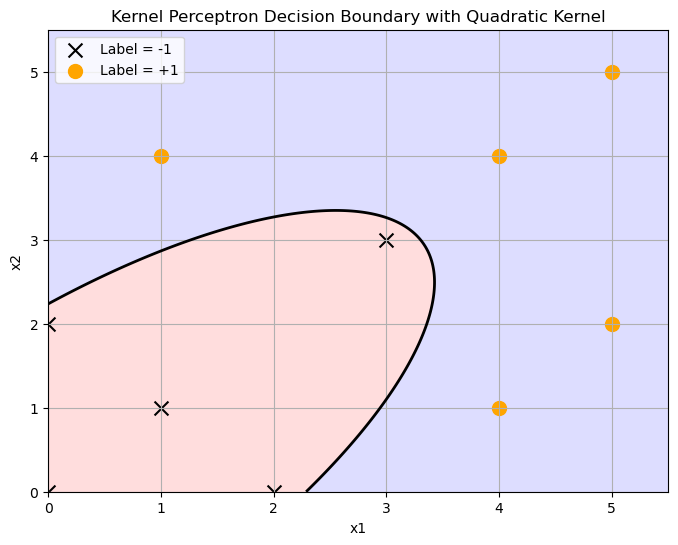

In [1]:
# Re-import libraries after code execution state reset
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic feature map function
def phi(x):
    x1, x2 = x
    return np.array([x1**2, np.sqrt(2)*x1*x2, x2**2])

# Final theta and theta_0 from previous output
theta = np.array([21.0, -22.627417, 22.0])
theta_0 = -110.0

# Extract support data
neg_points = [(0,0), (2,0), (1,1), (0,2), (3,3)]
pos_points = [(4,1), (5,2), (1,4), (4,4), (5,5)]

# Separate x and y coordinates for plotting
neg_x, neg_y = zip(*neg_points)
pos_x, pos_y = zip(*pos_points)

# Create a grid to evaluate the decision boundary
xx, yy = np.meshgrid(np.linspace(0, 5.5, 300), np.linspace(0, 5.5, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute phi(x) for each point on the grid
phi_grid = np.array([phi(x) for x in grid])

# Compute decision function: theta · phi(x) + theta_0
zz = phi_grid @ theta + theta_0
zz = zz.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, zz, levels=[-1e10, 0, 1e10], colors=['#FFAAAA', '#AAAAFF'], alpha=0.4)
plt.contour(xx, yy, zz, levels=[0], colors='k', linewidths=2)

plt.scatter(neg_x, neg_y, color='black', marker='x', s=100, label='Label = -1')
plt.scatter(pos_x, pos_y, color='orange', s=100, label='Label = +1')

plt.legend()
plt.title("Kernel Perceptron Decision Boundary with Quadratic Kernel")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.xlim(0, 5.5)
plt.ylim(0, 5.5)
plt.show()


# CNN and fully connected layers

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
titles = ["Fully Connected Layer", "Convolutional Layer"]

# Common settings
image_size = (5, 5)
feature_color = "orange"
connection_color = "gray"

# Draw input grid (image) on both subplots
for ax, title in zip(axes, titles):
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)

    # Draw image pixels
    for i in range(image_size[0]):
        for j in range(image_size[1]):
            rect = patches.Rectangle((i+0.5, j+0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)

# Draw connections for fully connected layer
# Assume one output node connected to all input pixels
for i in range(image_size[0]):
    for j in range(image_size[1]):
        axes[0].plot([i+1, 2.5], [j+1, -0.5], color=connection_color, linewidth=0.5)
axes[0].plot(2.5, -0.5, 'ro')  # Output node

# Draw convolutional filter (3x3)
for i, j in [(1, 1), (1, 2), (1, 3),
             (2, 1), (2, 2), (2, 3),
             (3, 1), (3, 2), (3, 3)]:
    rect = patches.Rectangle((i+0.5, j+0.5), 1, 1, linewidth=1, edgecolor='black', facecolor=feature_color)
    axes[1].add_patch(rect)

# Show output node for CNN at top right (after conv)
axes[1].plot(4.5, 4.5, 'ro')
axes[1].text(4.7, 4.5, "Feature\nDetected", fontsize=10, color='red')

plt.tight_layout()
plt.show()
